<a href="https://colab.research.google.com/github/farzad987/Python-Projects/blob/master/Stock_Market_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [ ]:
#Get the stock quote
df = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2020-12-17')
#showing data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2020-12-11,122.760002,120.550003,122.430000,122.410004,86939800.0,122.020096
2020-12-14,123.349998,121.540001,122.599998,121.779999,79184500.0,121.392097
2020-12-15,127.900002,124.129997,124.339996,127.879997,157243700.0,127.472664


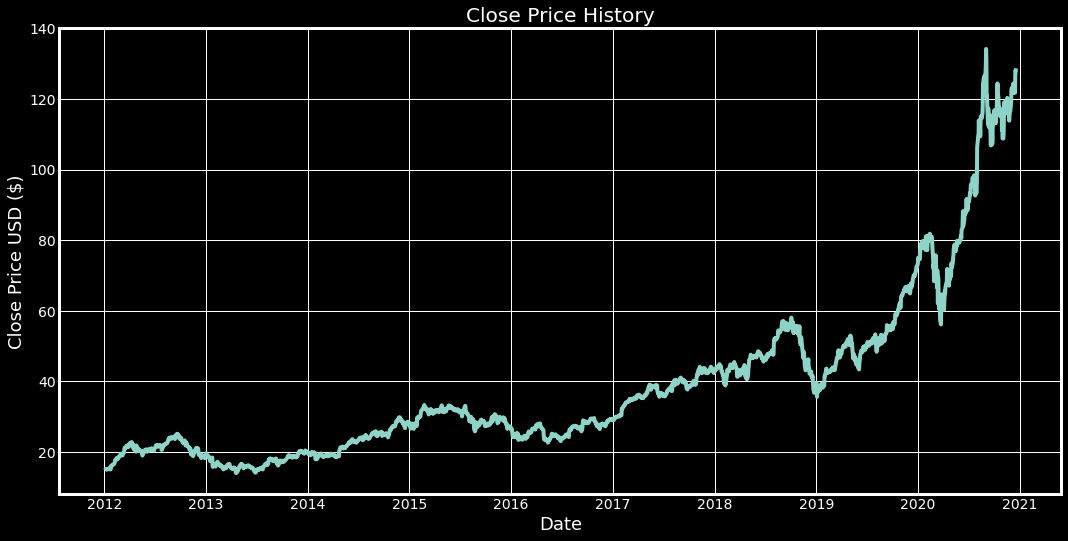

In [ ]:
 #Visualize the closing price
 plt.figure(figsize=(16,8))
 plt.title('Close Price History')
 plt.plot(df['Close'])
 plt.xlabel('Date',fontsize=18)
 plt.ylabel('Close Price USD ($)',fontsize=18)
 plt.show()

In [ ]:
#Create a new dataframe with only the close column
data = df.filter(['Close'])
#Convert dataframe into a numpy array
dataset=data.values
#Get number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0061488 ],
       [0.00680526],
       [0.00816869],
       ...,
       [0.94760156],
       [0.94701935],
       [0.95442167]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len]
#splitting into x_train and y_train
x_train=[]
y_train=[]
for i in range(66,len(train_data)):
  x_train.append(train_data[i-66:i,0])
  y_train.append(train_data[i,0])
  if i<=66:
    print(x_train)
    print(y_train)
    print()

[array([0.0061488 , 0.00680526, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869743, 0.01014998,
       0.01145994, 0.01105596, 0.00884298, 0.01095496, 0.00887566,
       0.01667305, 0.01607006, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182525, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512387,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499022, 0.04593482, 0.04796363, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.0639921 , 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562,
       0.06515056, 0.06208804, 0.06775564, 0.07093102, 0.06944283,
       0.07222615])]
[0.07298359569819068]



In [ ]:
#Convert the x_train and y_train into numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1739, 66, 1)

In [ ]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#Train the Model
model.fit(x_train, y_train, batch_size=1,epochs=1)

1739/1739 [==============================] - 56s 23ms/step - loss: 5.7050e-04


In [ ]:
#Create the testing dataset
#Create a new arraycontaining scaled values from index 1739 to 2021
test_data = scaled_data[training_data_len-60:,:]
#Create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [ ]:
#Convert the data into a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Get the models predicted values
predictions=model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

4.218133600746713

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


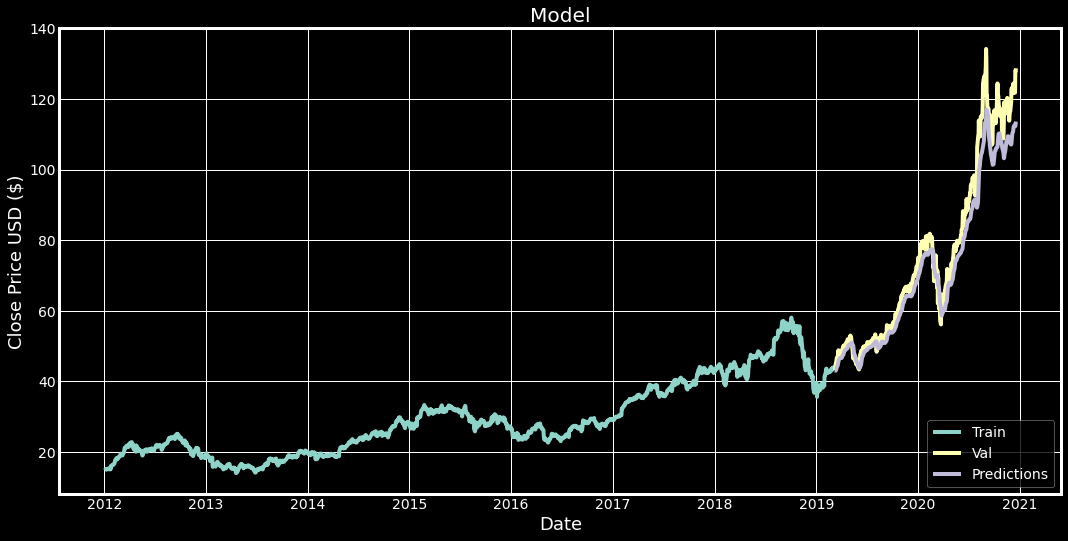

In [ ]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-03-08,43.227501,43.045197
2019-03-11,44.724998,42.977924
2019-03-12,45.227501,43.082100
2019-03-13,45.427502,43.317196
2019-03-14,45.932499,43.614471
...,...,...
2020-12-11,122.410004,112.468636
2020-12-14,121.779999,112.455254
2020-12-15,127.879997,112.291267


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2020-11-20')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Getting the last 60 day closign price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be the values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test=[]
#Append the past 60 days to X_test
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[109.15744]]


In [ ]:
apple_quote2 = web.DataReader('AAPL',data_source='yahoo',start='2020-11-19',end='2020-11-20')
print(apple_quote2['Close'])

Date
2020-11-19    118.639999
2020-11-20    117.339996
Name: Close, dtype: float64


In [ ]:
#============End=================